# National Trend

In [1]:
from pathlib import Path

import numpy as np
import seaborn as sns; sns.set(rc={'figure.figsize':(10, 10)})
import pandas as pd

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from src import utils, fitters

In [5]:
df = utils.extract_data(utils.national_data)

In [6]:
df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-20,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886
2020-03-21,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
2020-03-22,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
2020-03-23,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
2020-03-24,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


## Total Deceted Positive 

In [7]:
x = utils.get_date_range(df.index)
y = df["totale_casi"].to_numpy()

In [8]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))

In [9]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [10]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]))

Logistic(26.8285998148854, 0.19568587903397577, 114858.22799085251)
Peak:  2020-03-21
10% done: 2020-03-10
25% done: 2020-03-16
50% done: 2020-03-21
75% done: 2020-03-27
95% done: 2020-04-05
Plateau: 114858
GenLogistic(24.068639823987482, 0.12594872009907754, 159835.63223788512, 0.5196695201718449)
Peak:  2020-03-25
10% done: 2020-03-12
25% done: 2020-03-18
50% done: 2020-03-25
75% done: 2020-04-02
95% done: 2020-04-16
Plateau: 159835
Gompertz(167.7816261947743, 0.04937719544596507, 468932.9235305654)
Peak:  2020-04-05
10% done: 2020-03-20
25% done: 2020-03-30
50% done: 2020-04-13
75% done: 2020-05-01
95% done: 2020-06-05
Plateau: 468932


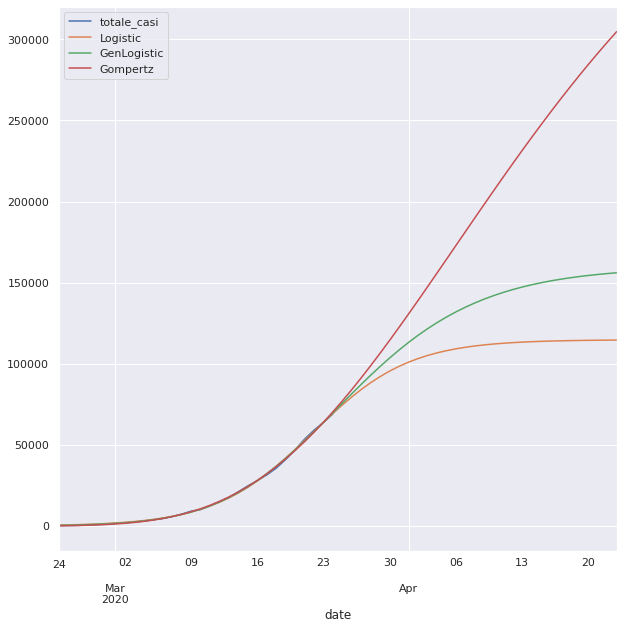

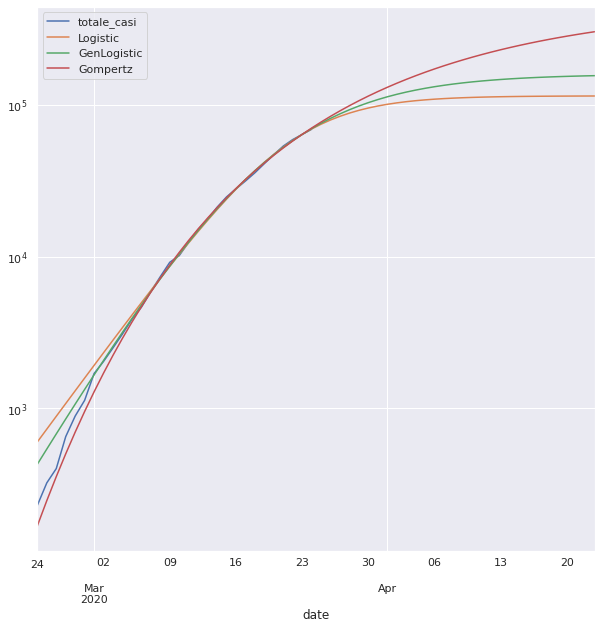

In [11]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "totale_casi", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);

## Lockdown effect 

In [12]:
lock_df = df.loc["2020-03-08":,:]
displacement = utils.ndays_since_start("2020-03-08", df)

In [13]:
l_x = utils.get_date_range(lock_df.index) + displacement
l_y = lock_df.totale_casi.to_numpy()

ul_x_cont = np.arange(0, displacement)
l_x_cont = np.arange(displacement, x.max()+30)

In [14]:
l_logistic = fitters.Logistic.fit(l_x, l_y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))
l_gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)
l_gompertz = fitters.Gompertz.fit(l_x, l_y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]), jac='cs')

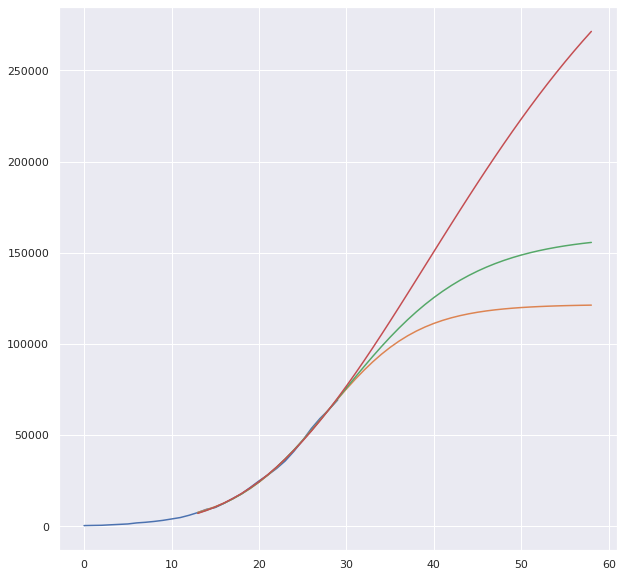

In [15]:
sns.lineplot(x, y)
sns.lineplot(l_x_cont, l_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gen_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gompertz.compute(l_x_cont));

In [16]:
utils.summary_of_model(l_logistic, df)
utils.summary_of_model(l_gen_logistic, df)
utils.summary_of_model(l_gompertz, df)

Logistic(27.437004544744273, 0.18858436159779762, 121601.40645128328)
Peak:  2020-03-22
10% done: 2020-03-10
25% done: 2020-03-16
50% done: 2020-03-22
75% done: 2020-03-28
95% done: 2020-04-07
Plateau: 121601
GenLogistic(24.068639823987482, 0.12594872009907754, 159835.63223788512, 0.5196695201718449)
Peak:  2020-03-25
10% done: 2020-03-12
25% done: 2020-03-18
50% done: 2020-03-25
75% done: 2020-04-02
95% done: 2020-04-16
Plateau: 159835
Gompertz(122.46371088920598, 0.05337231040599715, 391053.5765814825)
Peak:  2020-04-03
10% done: 2020-03-18
25% done: 2020-03-28
50% done: 2020-04-09
75% done: 2020-04-26
95% done: 2020-05-28
Plateau: 391053


## Deaths 

In [17]:
x = utils.get_date_range(df.index)
y = df["deceduti"].to_numpy()

In [18]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 5000], bounds=([0, 0.01, 1000],[100, 30, np.inf]))

In [19]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [20]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 1000],[np.inf, 5, np.inf]))

Logistic(28.0621609311983, 0.22433606734138078, 12311.69332299478)
Peak:  2020-03-23
10% done: 2020-03-13
25% done: 2020-03-18
50% done: 2020-03-23
75% done: 2020-03-27
95% done: 2020-04-05
Plateau: 12311
GenLogistic(-5.6534844841008836, 0.061477451940410065, 50876.3108965496, 0.056063927611985025)
Peak:  2020-04-10
10% done: 2020-03-21
25% done: 2020-03-30
50% done: 2020-04-10
75% done: 2020-04-25
95% done: 2020-05-23
Plateau: 50876
Gompertz(2.541459447359246, 0.05169744063408202, 66702.5207250699)
Peak:  2020-04-08
10% done: 2020-03-23
25% done: 2020-04-02
50% done: 2020-04-15
75% done: 2020-05-02
95% done: 2020-06-05
Plateau: 66702


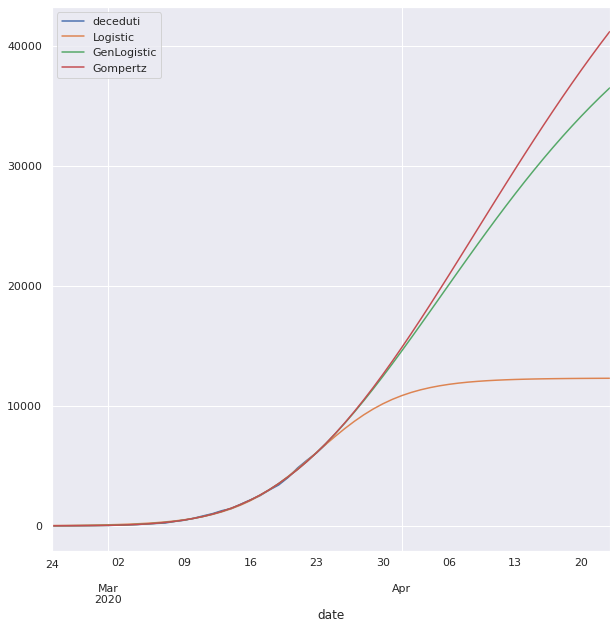

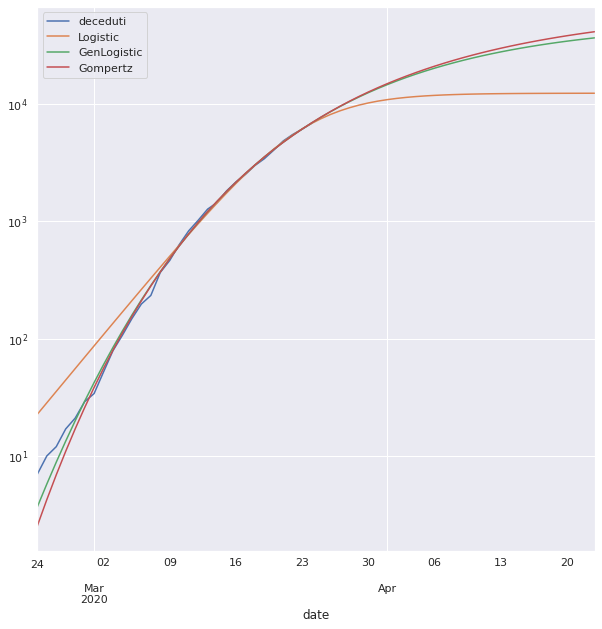

In [21]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "deceduti", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);